### **默认代码关联谷歌云盘**

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse -o nonempty drive

In [6]:
import os
os.chdir("drive")
!ls

aclImdb_v1.tar.gz     residual_plot.png      testData.tsv
data_description.txt  Sales		     Titanic
drive		      sample_submission.csv  torchtest.ipynb
GuodongDrive	      Sense1.ipynb	     train.csv
House		      Sense2.ipynb（副本）   Untitled0.ipynb
Houseprice.ipynb      Sense.ipynb	     剑指offer
huawei		      sensePY.ipynb	     数组和链表.desktop
labeledTrainData.tsv  submission.csv	     糖尿病数据.txt
neg		      test.csv


### **开始**

# **Step1: import labraries**

In [0]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
import numpy as np
import pandas as pd

#Step2 :Load Data

In [0]:
dataset = loadtxt('糖尿病数据.txt',delimiter = ",")

In [22]:
dataset.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


# split data into X and y

In [0]:
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets

In [0]:
seed = 7
test_size = 0.33
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state = seed)


# fit model on training data

In [32]:
model = XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# make predictions for test data

In [0]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [34]:
print(y_pred)

[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]


In [35]:
print(predictions)

[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,

# evaluate predictions

In [36]:
accuracy = accuracy_score(Y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


# exmaple of early stopping

XGBoost 模型可以在训练期间评估和报告模型的测试集上的表现。

它通过在训练模型和指定详细输出（ verbose = True ）时调用 **model.fit（）**时指定测试数据集和评估指标来支持此功能。

一旦没有对模型进行进一步改进，我们就可以使用此评估来停止训练。

我们可以通过在调用 **model.fit（）**时将 early_stopping_rounds 参数设置为在停止训练之前验证数据集未见改进的迭代次数来完成此操作。

In [37]:
eval_set = [(X_test,Y_test)]
model.fit(X_train,Y_train,early_stopping_rounds = 10,eval_metric = "logloss",eval_set = eval_set,verbose = True)


[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.61224
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.519769
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# make predictions for test data

In [39]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.56%


使用诸如梯度提升之类的决策树方法的集合的好处是它们可以从训练的预测模型自动提供特征重要性的估计。

### 经过训练的 XGBoost 模型可自动计算预测建模问题的特征重要性。

这些重要性分数可在训练模型的 feature_importances_ 成员变量中找到。例如，它们可以直接打印如下：

In [40]:
print(model.feature_importances_)

[0.07890794 0.30844045 0.06064048 0.07164859 0.10541682 0.16903177
 0.10197888 0.10393505]


### XGBoost 库提供了一个内置函数来绘制按其重要性排序的特征。

### 该函数称为 plot_importance（），可以按如下方式使用：

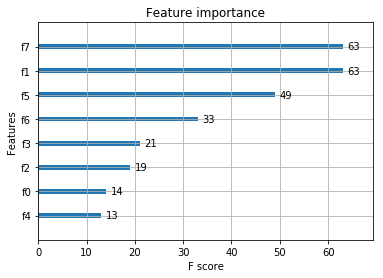

In [45]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

# 如何配置梯度提升

在原始梯度提升论文中发表了许多配置启发式方法。它们可以概括为：

学习率或收缩率（XGBoost 中的 learning_rate ）应设置为 0.1 或更低，较小的值将需要添加更多树。

树的深度（XGBoost 中的 tree_depth ）应该在 2 到 8 的范围内配置，其中对于更深的树没有多少益处。

行采样（XGBoost 中的子样本）应配置在训练数据集的 30％到 80％的范围内，并且与未采样的 100％的值进行比较。

这些是配置模型时的一个很好的起点。

一个好的通用配置策略如下：

运行默认配置并查看训练和验证数据集上的学习曲线图。

如果系统过度学习，则降低学习率和/或增加树木数量。

如果系统学习不足，可以通过提高学习率和/或减少树木数量来加快学习速度。

# XGBoost 超参数调整
scikit-learn 框架提供了搜索参数组合的功能。

此功能在 GridSearchCV 类中提供，可用于发现配置模型以获得最佳表现的最佳方法。

例如，我们可以定义一个树的数量（ n_estimators ）和树大小（ max_depth ）的网格，通过将网格定义为：

In [0]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

然后使用 10 倍交叉验证评估每个参数组合：

In [0]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, label_encoded_y)

我们可以查看结果，以确定最佳组合以及改变参数组合的一般趋势。

这是将 XGBoost 应用于您自己的问题时的最佳做法。要考虑调整的参数是：

* 树木的数量和大小（ n_estimators 和 max_depth ）。


* 学习率和树木数量（ learning_rate 和 n_estimators ）。

* 行和列子采样率（子样本， colsample_bytree 和 colsample_bylevel ）。

# learning_rate + GridSearch

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)


# summarize results

In [48]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.483013 using {'learning_rate': 0.1}
-0.689650 (0.000242) with: {'learning_rate': 0.0001}
-0.661274 (0.001954) with: {'learning_rate': 0.001}
-0.530747 (0.022961) with: {'learning_rate': 0.01}
-0.483013 (0.060755) with: {'learning_rate': 0.1}
-0.515440 (0.068974) with: {'learning_rate': 0.2}
-0.557315 (0.081738) with: {'learning_rate': 0.3}
